## Exercise4

Implement a function that takes two strings and returns an optimal local alignment (6 points) and score (6 points) using the Smith-Waterman algorithm; insert "-" as needed to indicate a gap (this is part of the alignment points). Your function should also take and correctly use three keyword arguments with defaults as follows: match=1, gap_penalty=1, mismatch_penalty=1 (6 points). Here, that is a penalty of one will be applied to match scores for each missing or changed letter.

Test it, and explain how your tests show that your function works. Be sure to test other values of match, gap_penalty, and mismatch_penalty (7 points).

## Response 

In [135]:
## Importing libraries 

import itertools
import numpy as np
import matplotlib.pyplot as plt

The basic steps for the Smith-Waterman algorithm include:

1. Initialization of a matrix.
2. Matrix Filling with the appropriate scores.
3. Trace back the sequences for a suitable alignment.

The algorithm has three parameters : match, gap_penalty and mismatch_penalty

#### Creating a function to initalize the scoring matrix

In [136]:
def scoring_matrix(seq1, seq2, match, mismatch, gap_penalty):
    sequence = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype = int)

    max_score = 0
    max_position = 0
    for i, j in itertools.product(range(1, sequence.shape[0]), range(1, sequence.shape[1])):

        if seq1[i - 1] == seq2[j - 1]:
            match_score = sequence[i - 1, j - 1] + match
       
        else:
            match_score = sequence[i - 1, j - 1] - mismatch
        
        delete = sequence[i - 1, j] - gap_penalty
        insert = sequence[i, j - 1] - gap_penalty
       
        score = max(match_score, delete, insert, 0)
        sequence[i, j] = score
       
        if score > max_score:
            max_score = score
            max_position = (i, j)
    print (sequence)
    return sequence, max_position

#### Creating a function to decide the next move when traceback and A function traceback() to get the optimal alignment of seq1 with seq2

In [137]:
def nextmove(sequence, x, y):
    diagonal = sequence[x-1][y-1]
    up = sequence[x-1][y]
    left = sequence[x][y-1]
    if diagonal >= up and diagonal >= left:
        if diagonal != 0:
            return 1
        else: return 0
    elif up > diagonal and up >= left:
        if up != 0:
            return 2
        else: return 0
    elif left > diagonal and left > up:
        if left != 0:
            return 3
        else: return 0
    else:
        print("error")
        
        
def traceback(seq1, seq2, sequence, start_position):
    aligned_seq1 = []
    aligned_seq2 = []
    x, y = start_position
    move = nextmove(sequence, x, y)
    while move != 0:
        if move == 1:
            aligned_seq1.append(seq1[x-1])
            aligned_seq2.append(seq2[y-1])
            x = x - 1
            y = y - 1
        elif move == 2:
            aligned_seq1.append(seq1[x-1])
            aligned_seq2.append('-')
            x = x - 1
        else:
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[y-1])
            y = y - 1

        move = nextmove(sequence, x, y)
    
    aligned_seq1.append(seq1[x - 1])
    aligned_seq2.append(seq2[y - 1])

    return ''.join(reversed(aligned_seq1)), ''.join(reversed(aligned_seq2))

#### Creating a function for smith_waterman algorithm 

In [138]:
def smith_waterman(seq1, seq2, match, mismatch, gap_penalty):
    sequence, start_position = scoring_matrix(seq1, seq2, match, mismatch, gap_penalty)
    seq1_aligned, seq2_aligned = traceback(seq1, seq2, sequence, start_position)
    final_score = sequence[start_position[0]][start_position[1]]
    
    plt.xticks(range(len(seq2)), labels=seq2)
    plt.yticks(range(len(seq1)), labels=seq1)
    plt.imshow(sequence, interpolation='nearest',cmap='binary')
    plt.gca().xaxis.tick_top()
    plt.show()
    
    print ("aligned seq1 = ", seq1_aligned)
    print ("aligned seq2 = ", seq2_aligned)
    print ("Best Alignment Score is" , final_score)

#### Testing the above function where : seq1 = 'tgcatcgagaccctacgtgac' and seq2 = 'actagacctagcatcgac' 

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 2 1 0 1 0 0 1]
 [0 1 0 0 1 0 1 0 0 0 1 0 1 3 2 1 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 2 4 3 2 1 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 1 1 3 5 4 3 2]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 2 4 6 5 4]
 [0 1 0 0 1 0 2 1 0 0 1 0 0 1 1 3 5 7 6]
 [0 0 0 0 0 2 1 1 0 0 0 2 1 0 0 2 4 6 6]
 [0 1 0 0 1 1 3 2 1 0 1 1 1 2 1 1 3 5 5]
 [0 0 2 1 0 0 2 4 3 2 1 0 2 1 1 2 2 4 6]
 [0 0 1 1 0 0 1 3 5 4 3 2 1 1 0 2 1 3 5]
 [0 0 1 0 0 0 0 2 4 4 3 2 3 2 1 1 1 2 4]
 [0 0 0 2 1 0 0 1 3 5 4 3 2 2 3 2 1 1 3]
 [0 1 0 1 3 2 1 0 2 4 6 5 4 3 2 2 1 2 2]
 [0 0 2 1 2 2 1 2 1 3 5 5 6 5 4 3 2 1 3]
 [0 0 1 1 1 3 2 1 1 2 4 6 5 5 4 3 4 3 2]
 [0 0 0 2 1 2 2 1 0 2 3 5 5 4 6 5 4 3 2]
 [0 0 0 1 1 2 1 1 0 1 2 4 4 4 5 5 6 5 4]
 [0 1 0 0 2 1 3 2 1 0 2 3 3 5 4 4 5 7 6]
 [0 0 2 1 1 1 2 4 3 2 1 2 4 4 4 5 4 6 8]]


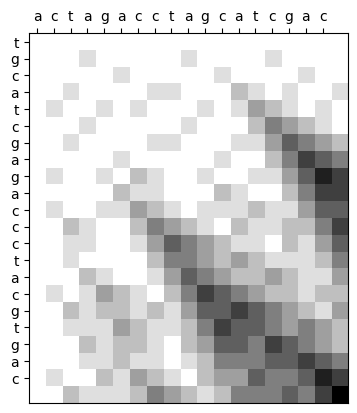

aligned seq1 =  agacccta-cgt-gac
aligned seq2 =  agacc-tagcatcgac
Best Alignment Score is 8


In [139]:
smith_waterman('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', 1, 1, 1)

#### Testing the above function where : seq1 = 'tgcatcgagaccctacgtgac' and seq2 = 'actagacctagcatcgac' and gap_penalty = 2

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 2 0 0 1 0 0 1]
 [0 1 0 0 1 0 1 0 0 0 1 0 0 3 1 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 1 4 2 0 0 0]
 [0 0 1 0 0 0 0 1 1 0 0 0 1 0 2 5 3 1 1]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 3 6 4 2]
 [0 1 0 0 1 0 2 0 0 0 1 0 0 1 0 1 4 7 5]
 [0 0 0 0 0 2 0 1 0 0 0 2 0 0 0 0 2 5 6]
 [0 1 0 0 1 0 3 1 0 0 1 0 1 1 0 0 0 3 4]
 [0 0 2 0 0 0 1 4 2 0 0 0 1 0 0 1 0 1 4]
 [0 0 1 1 0 0 0 2 5 3 1 0 1 0 0 1 0 0 2]
 [0 0 1 0 0 0 0 1 3 4 2 0 1 0 0 1 0 0 1]
 [0 0 0 2 0 0 0 0 1 4 3 1 0 0 1 0 0 0 0]
 [0 1 0 0 3 1 1 0 0 2 5 3 1 1 0 0 0 1 0]
 [0 0 2 0 1 2 0 2 1 0 3 4 4 2 0 1 0 0 2]
 [0 0 0 1 0 2 1 0 1 0 1 4 3 3 1 0 2 0 0]
 [0 0 0 1 0 0 1 0 0 2 0 2 3 2 4 2 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 1 1 2 2 3 3 1 0]
 [0 1 0 0 1 0 2 0 0 0 1 0 0 2 1 1 2 4 2]
 [0 0 2 0 0 0 0 3 1 0 0 0 1 0 1 2 0 2 5]]


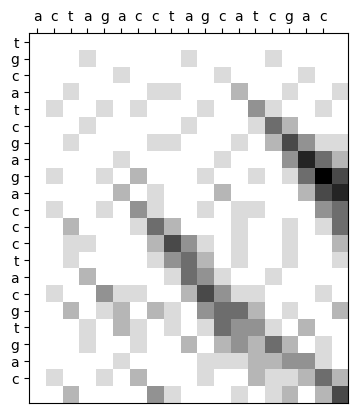

aligned seq1 =  gcatcga
aligned seq2 =  gcatcga
Best Alignment Score is 7


In [140]:
smith_waterman('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', 1, 1, 2)

#### Testing the above function where : seq1 = 'tgcatcgagaccctacgtgac' and seq2 = 'actagacctagcatcgac' , and and match, gap_penalty, and mismatch_penalty = (3,3,3)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  3  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  3  0  0  0  0  3  0  0]
 [ 0  0  3  0  0  0  0  3  3  0  0  0  6  3  0  3  0  0  3]
 [ 0  3  0  0  3  0  3  0  0  0  3  0  3  9  6  3  0  3  0]
 [ 0  0  0  3  0  0  0  0  0  3  0  0  0  6 12  9  6  3  0]
 [ 0  0  3  0  0  0  0  3  3  0  0  0  3  3  9 15 12  9  6]
 [ 0  0  0  0  0  3  0  0  0  0  0  3  0  0  6 12 18 15 12]
 [ 0  3  0  0  3  0  6  3  0  0  3  0  0  3  3  9 15 21 18]
 [ 0  0  0  0  0  6  3  3  0  0  0  6  3  0  0  6 12 18 18]
 [ 0  3  0  0  3  3  9  6  3  0  3  3  3  6  3  3  9 15 15]
 [ 0  0  6  3  0  0  6 12  9  6  3  0  6  3  3  6  6 12 18]
 [ 0  0  3  3  0  0  3  9 15 12  9  6  3  3  0  6  3  9 15]
 [ 0  0  3  0  0  0  0  6 12 12  9  6  9  6  3  3  3  6 12]
 [ 0  0  0  6  3  0  0  3  9 15 12  9  6  6  9  6  3  3  9]
 [ 0  3  0  3  9  6  3  0  6 12 18 15 12  9  6  6  3  6  6]
 [ 0  0  6  3  6  6  3  6  3  9 15 15 18

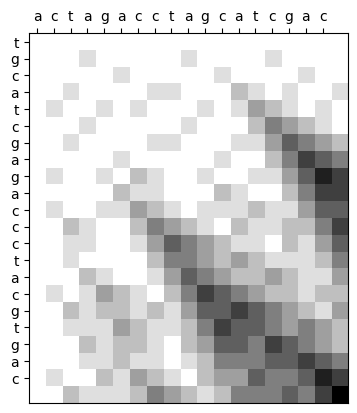

aligned seq1 =  agacccta-cgt-gac
aligned seq2 =  agacc-tagcatcgac
Best Alignment Score is 24


In [141]:
smith_waterman('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', 3, 3, 3)

#### Testing the above function where : seq1 = 'tgcatcgagaccctacgtgac' and seq2 = 'actagacctagcatcgac' , and and match, gap_penalty, and mismatch_penalty = (3,3,5)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  3  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  3  0  0  0  0  3  0  0]
 [ 0  0  3  0  0  0  0  3  3  0  0  0  6  1  0  3  0  0  3]
 [ 0  3  0  0  3  0  3  0  0  0  3  0  1  9  4  0  0  3  0]
 [ 0  0  0  3  0  0  0  0  0  3  0  0  0  4 12  7  2  0  0]
 [ 0  0  3  0  0  0  0  3  3  0  0  0  3  0  7 15 10  5  3]
 [ 0  0  0  0  0  3  0  0  0  0  0  3  0  0  2 10 18 13  8]
 [ 0  3  0  0  3  0  6  1  0  0  3  0  0  3  0  5 13 21 16]
 [ 0  0  0  0  0  6  1  3  0  0  0  6  1  0  0  0  8 16 18]
 [ 0  3  0  0  3  1  9  4  0  0  3  1  3  4  0  0  3 11 13]
 [ 0  0  6  1  0  0  4 12  7  2  0  0  4  0  1  3  0  6 14]
 [ 0  0  3  3  0  0  0  7 15 10  5  0  3  1  0  4  0  1  9]
 [ 0  0  3  0  0  0  0  3 10 12  7  2  3  0  0  3  1  0  4]
 [ 0  0  0  6  1  0  0  0  5 13  9  4  0  0  3  0  0  0  0]
 [ 0  3  0  1  9  4  3  0  0  8 16 11  6  3  0  0  0  3  0]
 [ 0  0  6  1  4  6  1  6  3  3 11 13 14

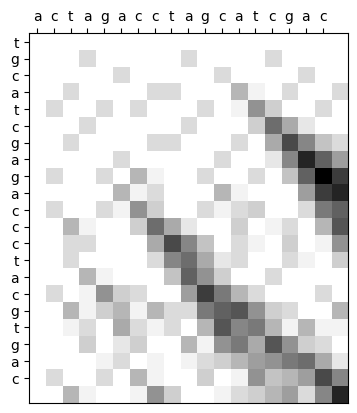

aligned seq1 =  gcatcga
aligned seq2 =  gcatcga
Best Alignment Score is 21


In [142]:
smith_waterman('tgcatcgagaccctacgtgac', 'actagacctagcatcgac', 3, 3, 5)

#### Explaination : Smith–Waterman algorithm aligns two sequences by matches/mismatches (also known as substitutions), insertions, and deletions. Both insertions and deletions are the operations that introduce gaps, which are represented by dashes. The algorithm has four major steps : Determining the substitution matrix and the gap penalty scheme, Initializing the scoring matrix, Scoring and Traceback. In the algorithm the two sequences are arranged in a matrix form with A+1columns and B+1rows and the values in the first row and first column are set to zero. The second and crucial step of the algorithm is filling the entire matrix, so it is more important to know the neighbor values (diagonal, upper and left) of the current cell to fill each and every cell. The second and crucial step of the algorithm is filling the entire matrix. The final step for the appropriate alignment is trace backing, prior to that one needs to find out the maximum score obtained in the entire matrix for the local alignment of the sequences. From the scoring matrix, the S-W algorithm finds the highest score and traces back the path of the previous highest scores. This in essence determines the places in the query sequence in which to place dashes (insertions or deletions). The calculated path can then report to the user the sequence in the database that best matches the query string. The two alignments can be given with a score, for matching as +1 , mismatch as -1 and gap penalty as -1(the values can be varied), sum up all the individual scores and the alignment which has maximum score after this can be taken as the best alignment. 

Reference : https://vlab.amrita.edu/?sub=3&brch=274&sim=1433&cnt=1